In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
import scipy.optimize #fmin_cg to train neural network
import itertools
from scipy.special import expit #Vectorized sigmoid function
import csv
import torch

In [46]:
# data taken from https://www.kaggle.com/ronitf/heart-disease-uci#heart.csv
datafile = "data/heart.csv"

data = np.zeros((303,14))

# reading data from csv and putting into np array
with open(datafile) as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    i = 0
    count = 0
    for row in csvReader:
        row = np.reshape(row,len(row),1)
        if (count == 0):
            count = -1
            continue
        else:
            data[i,:] = row
            i += 1

# X.shape = 303 x 13
X = data[:,0:13]
X = np.insert(X, 0, 1, axis = 1)

# y.shape = 303 x 1
y = data[:,13]
y = y.reshape(len(y),1)



Going with the model of 3 layers
<br>
<b>Input Layer</b> 13 nodes
<br>
<b>Hidden Layer a2 </b> 7 nodes
<br>
<b>Hidden Layer a3 </b> 4 nodes
<br>
<b>Output Layer</b> 1 node
<br>
Determined by 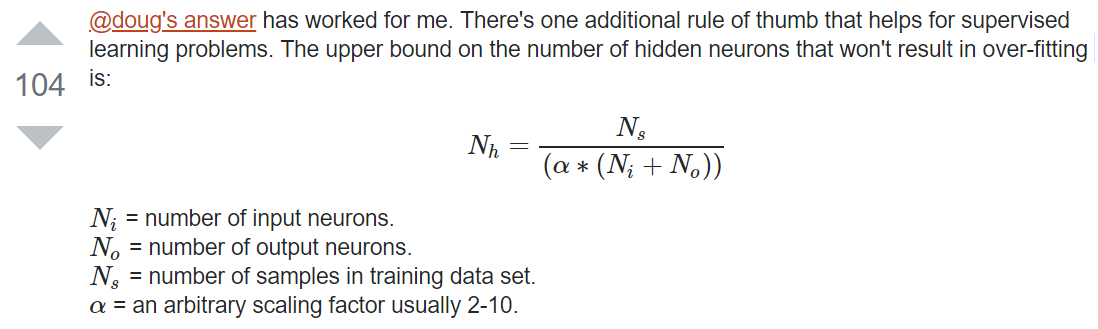

In [47]:
theta1 = np.zeros((7,14))
theta2 = np.zeros((4,8))
theta3 = np.zeros((1,5))

inputLayerSize = 13
hiddenLayerSize1 = 7
hiddenLayerSize2 = 4
outputLayerSize = 1

# insert bias column of 1s
m = X.shape[0]
n = X.shape[1]


print(m)
print(n)

303
14


In [48]:
# tested and passed
def reshape(X, m, n):
    """ @param X : passed in as an unrolled vector
        @param m : number of rows or examples
        @param n : number of features"""
    
    return np.array(X.reshape(m,n))

# tested and passed
def flatten(X):
    return np.array(X.flatten()).reshape((X.shape[0]*X.shape[1]),1)

# tested and passed
def flattenThetas(theta1,theta2,theta3):
    return np.r_[theta1.ravel(),theta2.ravel(),theta3.ravel()]

# tested and passed
def unrollThetas(thetas):
    """ @param thetas : all thetas appended to each other
    """
    theta1Size = (hiddenLayerSize1 * (inputLayerSize + 1))
    theta1 = thetas[0:theta1Size].reshape(hiddenLayerSize1, inputLayerSize + 1)
    
    theta2Size = hiddenLayerSize2 * (hiddenLayerSize1 + 1) + theta1Size
    theta2 = thetas[theta1Size : theta2Size].reshape(hiddenLayerSize2, hiddenLayerSize1 + 1)
    
    theta3 = thetas [theta2Size:].reshape(outputLayerSize, hiddenLayerSize2 + 1)
    
    return theta1, theta2, theta3
    
def flattenParams(Ds):
    """
    Hand this function a list of theta matrices, and it will flatten it
    into one long (n,1) shaped numpy array
    """
    flattenedDs = [ Ds.flatten() for curD in Ds ]
    combined = list(itertools.chain.from_iterable(flattenedDs))
    assert len(combined) == (inputLayerSize + 1) * hiddenLayerSize1 + \
                            (hiddenLayerSize + 1) * hiddenLayerSize2 + \
                            (hiddenLayerSize2 + 1) * outputLayerSize
                        
    return np.array(combined).reshape((len(combined),1))

In [50]:
# @param thetas - passed in as a vector, needs to be reshaped
# @param X      - passed in as a vector, needs to be reshaped
# @param y      - passed in as a vector, doesn't need to be reshape
# @param lmbda  - the regularization variable lambda

def costFunction(thetas, X, y, lmbda = 0):
    X = reshape(X, m, n)
    theta1, theta2, theta3 = unrollThetas(thetas)
    
    # X already has the bias unit 
    a1 = X
    
    z2 = theta1.dot(a1.T)
    a2 = expit(z2)
    a2 = np.insert(a2, 0, 1, axis = 0)
    
    z3 = theta2.dot(a2)
    a3 = expit(z3)
    a3 = np.insert(a3, 0, 1, axis = 0)
    
    z4 = theta3.dot(a3)
    a4 = expit(z4)
    # a4 is the output so we don't need to add bias unit
    
    tempY = pd.get_dummies(y.ravel()).values
    
    
    
    




thetas = flattenThetas(theta1,theta2,theta3)
Xflat = flatten(X)
costFunction(thetas,Xflat,y)